# Изучаем данные

Для работы с табличными данными импортируем библиотеку pandas как pd и считываем файлы в каждую соответствующую говорящую переменную.

In [1]:
import pandas as pd
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

## Изучаем файл 'calls'

In [2]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Свиду данные в порядке, ничего в глаза не бросается. Есть вся необходимая информация: кто звонил 'user_id', когд 'call_date' и длительность вызова 'duration'. Пустых элементов нет.

Проверим на дубликаты.

In [4]:
calls.duplicated().sum()

0

Дубликатов нет.

Посмотрим на уникальные значения.

In [5]:
calls['call_date'].value_counts()

2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

Странных значений нет, видим что много звонков 2018-12-31/30/29, оно и понятно - период предновогодних поздравлений.

In [6]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

А вот это уже не нормально, более 39 тысяч вызовов с временем разговора 0 мин. Видимо это те вызовы, которые сразу оборвались после поднятия трубки. И поскольку факт принятия вызова был, то хоть и с нулевой длительность, но записывается в CDR (https://ru.wikipedia.org/wiki/Call_Detail_Record), а значит он тарифицируется. Поскольку вызовы до минуты тарифицируются как минута, заменим все нули на 1.

In [7]:
calls['duration'] = calls['duration'].replace(0, 1)

Проверяем корректность.

In [8]:
calls.query('duration == 0').shape[0]

0

In [9]:
calls['user_id'].value_counts()

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [10]:
calls[calls['duration'] == 0].shape[0]

0

Все в порядке.

Поменяем тип у данных на более логически близкий.

'user_id' c текстового на целочисленный.

In [11]:
calls['user_id'] = calls['user_id'].astype('int')

'call_date' с текстового на временной.

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

Убеждаемся что изменения прошли корректно.

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


## Изучаем файл 'internet'

In [14]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пустых значений нет, данные свиду нормальные. В глаза бросается дублирующий столбец 'Unnamed: 0', к тому же в описании про него ничего не сказано, удалим его.

In [16]:
internet.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Проверим на дубликаты.

In [18]:
internet.duplicated().sum()

0

Дубликатов нет.

Посмотрим на уникальные значения.

In [19]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Выделяются только нулевые значения, видимо это те люди, которые не пользуются интернетом в принципе.

In [20]:
internet['session_date'].value_counts()

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

Те же предновогодние пики.

In [21]:
internet['user_id'].value_counts()

1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

Все в порядке.

Меняем тип данных.

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
internet['user_id'] = internet['user_id'].astype('int')

## Изучаем файл 'messages'

In [23]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В целом все в порядке.

Проверим на дубликаты.

In [25]:
messages.duplicated().sum()

0

Дубликатов нет.

Посмотрим на уникальные значения.

In [26]:
messages['message_date'].value_counts()

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-11     12
2018-01-04     10
2018-01-05     10
2018-01-02     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

Предновогодние сообщения, в остальном все в порядке. Остальные столбцы не нуждаются в просмотре.

Меняем тип у 'message_date'

In [27]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
messages['user_id'] = messages['user_id'].astype('int')

## Изучаем файл 'tariffs'

In [28]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [29]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Информация о двух тарфиках, все в порядке, можно переходить дальше.

## Изучаем файл 'users'

In [30]:
#users.head()

Сохраним отдельно данные с городами, пригодится для задания в конце.

In [31]:
users_city = users[['user_id', 'city']]

In [32]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Много информации о пользователях, такая как имя, фамилия, возраст и пр. Главное, что есть привязка тарифа к user_id.

Проверим на дубликаты.

In [33]:
users.duplicated().sum()

0

Дубликатов нет.

Все в порядке, пустоты только в 'churn_date', но на это есть пометка в описании, нет нужды трогать их.

Поменяем тип данных у временных столбцов.

In [34]:
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')

In [35]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Вывод
Данные вполне корректные и понятные. Видна повышенная нагрузка на все услуги в предновогодние дни. Поменяли тип переменных к более логически верным. Дубликатов нет. Пустых значий можно сказать тоже нет. Исправили ошибку в данных, а именно нулевые вызовы. Можно приступать к следующему шагу.

# Подготовка данных

## Считаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам

Добавляем столбец с месяцами.

In [37]:
calls['call_month'] = pd.DatetimeIndex(calls['call_date']).month

In [38]:
calls.head()

,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,1.00,1000,7
1,1000_1,2018-08-17,1.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Все вызовы тарифицируются по минуте, поэтому округлим все значения длительности вызовов вправо, используя библиотеку np и метод ceil(), и добавим новые значения в столбец 'duration_r' (r - round)

In [39]:
import numpy as np
calls['duration_r'] = np.ceil(calls['duration'])

Проверяем корректность округления.

In [40]:
calls.loc[202605, ['duration', 'duration_r']]

duration      4.27
duration_r       5
Name: 202605, dtype: object

Было 'duration' = 4.27, стало 'duration_r' = 5, корректно.

Группируем по 'user_id' и 'call_month', и применяем функции sum и count согласно задаче. Через unstack() выносим 'call_month' наверх.

In [41]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
user_calls = calls.pivot_table(index=['user_id', 'call_month'], values='duration_r', aggfunc=['sum', 'count']).unstack()
user_calls.head(10)

sum                                                          \
           duration_r                                                           
call_month         1      2      3      4      5      6      7      8      9    
user_id                                                                         
1000              NaN    NaN    NaN    NaN  164.0  187.0  346.0  418.0  478.0   
1001              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002              NaN    NaN    NaN    NaN    NaN  118.0  219.0  294.0  217.0   
1003              NaN    NaN    NaN    NaN    NaN    NaN    NaN  392.0  990.0   
1004              NaN    NaN    NaN    NaN   37.0  177.0  137.0  138.0  125.0   
1005             99.0  470.0  620.0  736.0  606.0  623.0  584.0  626.0  488.0   
1006              NaN   42.0  296.0  365.0  381.0  483.0  327.0  285.0  367.0   
1007              NaN    NaN    NaN  202.0  490.0  558.0  589.0  483.0  674.0   
1008              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1009              NaN    NaN  110.0  328.0  176.0  290.0  185.0  255.0  138.0   

                                     count                                 \
                                duration_r                                  
call_month     10     11     12         1     2     3      4     5     6    
user_id                                                                     
1000        363.0  344.0  341.0        NaN   NaN   NaN    NaN  22.0  43.0   
1001          NaN  444.0  430.0        NaN   NaN   NaN    NaN   NaN   NaN   
1002        221.0  250.0  242.0        NaN   NaN   NaN    NaN   NaN  15.0   
1003        866.0  844.0  822.0        NaN   NaN   NaN    NaN   NaN   NaN   
1004        153.0  121.0  136.0        NaN   NaN   NaN    NaN   9.0  31.0   
1005        745.0  562.0  613.0       15.0  69.0  77.0  101.0  73.0  80.0   
1006        276.0  388.0  385.0        NaN   3.0  46.0   47.0  56.0  53.0   
1007        481.0  594.0  439.0        NaN   NaN   NaN   25.0  67.0  68.0   
1008          NaN    NaN  350.0        NaN   NaN   NaN    NaN   NaN   NaN   
1009        219.0  297.0  237.0        NaN   NaN  13.0   39.0  28.0  31.0   

                                                    
                                                    
call_month    7     8      9      10     11     12  
user_id                                             
1000        47.0  52.0   58.0   57.0   43.0   46.0  
1001         NaN   NaN    NaN    NaN   59.0   63.0  
1002        26.0  42.0   36.0   33.0   32.0   33.0  
1003         NaN  55.0  134.0  108.0  115.0  108.0  
1004        22.0  19.0   26.0   29.0   19.0   21.0  
1005        77.0  71.0   66.0  100.0   75.0   84.0  
1006        49.0  42.0   54.0   44.0   62.0   50.0  
1007        69.0  74.0   87.0   69.0   81.0   72.0  
1008         NaN   NaN    NaN    NaN    NaN   52.0  
1009        22.0  33.0   25.0   28.0   39.0   32.0

In [42]:
user_calls.shape[0]

492

8 пользователей не звонило вообще.

## Считаем для каждого пользователя количество отправленных сообщений по месяцам

Добавляем месяцы.

In [43]:
messages['message_month'] = pd.DatetimeIndex(messages['message_date']).month

In [44]:
messages.head()

,id,message_date,user_id,message_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Группируем согласно условию.

In [45]:
messages.pivot_table(index=['user_id', 'message_month'], values='message_date', aggfunc='count').unstack().head(10)

message_date                                               \
message_month           1     2     3     4     5      6      7      8    
user_id                                                                   
1000                   NaN   NaN   NaN   NaN  22.0   60.0   75.0   81.0   
1002                   NaN   NaN   NaN   NaN   NaN    4.0   11.0   13.0   
1003                   NaN   NaN   NaN   NaN   NaN    NaN    NaN   37.0   
1004                   NaN   NaN   NaN   NaN  95.0  134.0  181.0  151.0   
1005                   7.0  38.0  56.0  41.0  42.0   47.0   56.0   64.0   
1007                   NaN   NaN   NaN  11.0  39.0   26.0   26.0   27.0   
1008                   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN   
1009                   NaN   NaN   2.0  14.0   7.0   14.0   14.0    9.0   
1011                   NaN   NaN   4.0   7.0  13.0   13.0   13.0   15.0   
1012                   NaN   NaN   2.0  21.0  10.0   15.0   12.0   23.0   

                                           
message_month     9      10     11     12  
user_id                                    
1000            57.0   73.0   58.0   70.0  
1002             4.0   10.0   16.0   12.0  
1003            91.0   83.0   94.0   75.0  
1004           146.0  165.0  158.0  162.0  
1005            52.0   44.0   51.0   54.0  
1007            31.0   18.0   21.0   26.0  
1008             NaN    NaN    NaN   56.0  
1009            12.0   15.0   11.0   12.0  
1011            10.0   17.0   12.0    6.0  
1012            14.0   13.0   25.0   15.0

In [46]:
messages.pivot_table(index=['user_id', 'message_month'], values='message_date', aggfunc='count').unstack().shape[0]

426

74 пользователя не посылало сообщений вообще.

## Считаем для каждого пользователя объем израсходованного интернет-трафика по месяцам

Добавляем месяцы.

In [47]:
internet['session_month'] = pd.DatetimeIndex(internet['session_date']).month

In [48]:
internet.head()

,id,mb_used,session_date,user_id,session_month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Группируем.

In [49]:
internet.pivot_table(index=['user_id', 'session_month'], values='mb_used', aggfunc='sum').unstack().head(10)

mb_used                                                   \
session_month       1        2         3         4         5         6    
user_id                                                                   
1000               NaN      NaN       NaN       NaN   2253.49  23233.77   
1001               NaN      NaN       NaN       NaN       NaN       NaN   
1002               NaN      NaN       NaN       NaN       NaN  10856.82   
1003               NaN      NaN       NaN       NaN       NaN       NaN   
1004               NaN      NaN       NaN       NaN  13403.98  17600.02   
1005           2727.97  7383.93  11104.25   9351.72   7865.53   9863.19   
1006               NaN  1392.15  17287.93  13936.70  12965.41  12371.66   
1007               NaN      NaN       NaN   8022.76  17687.27  13654.52   
1008               NaN      NaN       NaN       NaN       NaN       NaN   
1009               NaN      NaN   7350.15  14709.22  13371.89  16067.51   

                                                                           
session_month        7         8         9         10        11        12  
user_id                                                                    
1000           14003.64  14055.93  14568.91  14702.49  14756.47   9817.61  
1001                NaN       NaN       NaN       NaN  18429.34  14036.66  
1002           17580.10  20319.26  16691.08  13888.25  18587.28  18113.73  
1003                NaN   8565.21  12468.87  14768.14  11356.89  10121.53  
1004           22229.58  28584.37  15109.03  18475.44  15616.02  18021.04  
1005            7694.56   7543.63   7016.46   7800.93  12666.95   8668.19  
1006           19977.60  19303.71  15521.53  19696.60  13259.41  18476.11  
1007           15656.66  20700.40  12613.05  14427.33  16369.61  12494.07  
1008                NaN       NaN       NaN       NaN       NaN  13217.14  
1009           24725.84  23708.41  21932.59  20081.73  16845.85  18618.02

In [50]:
internet.pivot_table(index=['user_id', 'session_month'], values='mb_used', aggfunc='sum').unstack().shape[0]

497

3 пользователя не пользовалось интернетом вообще.

Объединим несколько таблиц, которые потребуются в будущем.

Сделам таблицу пару user_id - tariff

In [51]:
user_tariff = users[['user_id', 'tariff']]
user_tariff.head()

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


Поменяем название столбца в tariffs с 'tariff_name' на 'tariff', чтобы в последствии по этому столбцу соединить две таблицы.

In [52]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [53]:
tariffs.columns=['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

In [54]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Соединяем таблицы user_tariff и tariffs, сохраняем что получилось в user_tariff_all.

In [55]:
user_tariff_all = user_tariff.merge(tariffs, on='tariff').sort_values(by='user_id').reset_index(drop=True)
user_tariff_all.head()

,user_id,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,1000,30720,3000,1950,150,1,1
1,1001,smart,50,15360,500,550,200,3,3
2,1002,smart,50,15360,500,550,200,3,3
3,1003,ultra,1000,30720,3000,1950,150,1,1
4,1004,ultra,1000,30720,3000,1950,150,1,1


Пример роста объема звонков с каждым месяцем.

In [56]:
user_calls['count'].sum()

            call_month
duration_r  1              1476.0
            2              3328.0
            3              6687.0
            4              9272.0
            5             12647.0
            6             14716.0
            7             18298.0
            8             21488.0
            9             24061.0
            10            27146.0
            11            29501.0
            12            33987.0
dtype: float64

## Вывод
Для каждой услуги мы добавили месяц и сгруппировали по нему. Тем самым получили распределенные данные по месяцам, что будет полезно для анализа впоследствии. Также сделали существенную корректировку с длительностью вызовов, округлив их по минутам в большую сторону, это даст нам корректные данные для расчета выручки.   
Если просуммировать всех пользователей, то везде наблюдается рост нагрузки с каждым месяцем. На это может влиять как то, что каждый человек больше пользуется услугами, так и просто увеличение пользователей на сети. Скорее всего это связано с увеличением числа абонентов с каждым месяцем.

# Расчет помесячной выручки с каждого клиента

Предварительно найдем помесячную выручку по каждой услуге, а потом их все объединим.

## Считаем помесячную выручку с каждого клиента за телефонные разговоры сверх включенных в тариф минут

In [57]:
user_calls.head()

sum                                                        \
           duration_r                                                         
call_month         1   2   3   4      5      6      7      8      9      10   
user_id                                                                       
1000              NaN NaN NaN NaN  164.0  187.0  346.0  418.0  478.0  363.0   
1001              NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002              NaN NaN NaN NaN    NaN  118.0  219.0  294.0  217.0  221.0   
1003              NaN NaN NaN NaN    NaN    NaN    NaN  392.0  990.0  866.0   
1004              NaN NaN NaN NaN   37.0  177.0  137.0  138.0  125.0  153.0   

                              count                                      \
                         duration_r                                       
call_month     11     12         1   2   3   4     5     6     7     8    
user_id                                                                   
1000        344.0  341.0        NaN NaN NaN NaN  22.0  43.0  47.0  52.0   
1001        444.0  430.0        NaN NaN NaN NaN   NaN   NaN   NaN   NaN   
1002        250.0  242.0        NaN NaN NaN NaN   NaN  15.0  26.0  42.0   
1003        844.0  822.0        NaN NaN NaN NaN   NaN   NaN   NaN  55.0   
1004        121.0  136.0        NaN NaN NaN NaN   9.0  31.0  22.0  19.0   

                                        
                                        
call_month     9      10     11     12  
user_id                                 
1000         58.0   57.0   43.0   46.0  
1001          NaN    NaN   59.0   63.0  
1002         36.0   33.0   32.0   33.0  
1003        134.0  108.0  115.0  108.0  
1004         26.0   29.0   19.0   21.0

In [58]:
user_calls_sum_per_month = user_calls

In [59]:
user_calls_sum_per_month.drop('count', axis=1, inplace=True)

Преобразуем таблицу к приемлему виду и уже с ней будем работать.

In [60]:
user_calls_sum_per_month.head()

sum                                                        \
           duration_r                                                         
call_month         1   2   3   4      5      6      7      8      9      10   
user_id                                                                       
1000              NaN NaN NaN NaN  164.0  187.0  346.0  418.0  478.0  363.0   
1001              NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002              NaN NaN NaN NaN    NaN  118.0  219.0  294.0  217.0  221.0   
1003              NaN NaN NaN NaN    NaN    NaN    NaN  392.0  990.0  866.0   
1004              NaN NaN NaN NaN   37.0  177.0  137.0  138.0  125.0  153.0   

                          
                          
call_month     11     12  
user_id                   
1000        344.0  341.0  
1001        444.0  430.0  
1002        250.0  242.0  
1003        844.0  822.0  
1004        121.0  136.0

In [61]:
user_calls_sum_per_month_SUM = user_calls_sum_per_month

In [62]:
user_calls_sum_per_month_SUM.head()

sum                                                        \
           duration_r                                                         
call_month         1   2   3   4      5      6      7      8      9      10   
user_id                                                                       
1000              NaN NaN NaN NaN  164.0  187.0  346.0  418.0  478.0  363.0   
1001              NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002              NaN NaN NaN NaN    NaN  118.0  219.0  294.0  217.0  221.0   
1003              NaN NaN NaN NaN    NaN    NaN    NaN  392.0  990.0  866.0   
1004              NaN NaN NaN NaN   37.0  177.0  137.0  138.0  125.0  153.0   

                          
                          
call_month     11     12  
user_id                   
1000        344.0  341.0  
1001        444.0  430.0  
1002        250.0  242.0  
1003        844.0  822.0  
1004        121.0  136.0

In [63]:
user_calls_sum_per_month.reset_index(inplace=True)

In [64]:
user_calls_sum_per_month.head()

user_id        sum                                                 \
                   duration_r                                                  
call_month                  1   2   3   4      5      6      7      8      9   
0             1000        NaN NaN NaN NaN  164.0  187.0  346.0  418.0  478.0   
1             1001        NaN NaN NaN NaN    NaN    NaN    NaN    NaN    NaN   
2             1002        NaN NaN NaN NaN    NaN  118.0  219.0  294.0  217.0   
3             1003        NaN NaN NaN NaN    NaN    NaN    NaN  392.0  990.0   
4             1004        NaN NaN NaN NaN   37.0  177.0  137.0  138.0  125.0   

                                 
                                 
call_month     10     11     12  
0           363.0  344.0  341.0  
1             NaN  444.0  430.0  
2           221.0  250.0  242.0  
3           866.0  844.0  822.0  
4           153.0  121.0  136.0

Поменяем именование колонок с месяцами с цифр на названия этих месяцев.

In [65]:
user_calls_sum_per_month.columns=['user_id', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

Получили красивую таблицу, с ней и будем работать.

In [66]:
user_calls_sum_per_month.head()

,user_id,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.0,430.0
2,1002,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,250.0,242.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,866.0,844.0,822.0
4,1004,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,153.0,121.0,136.0


Склеим ее с таблицей по стоимости услуг по звонках и убирем лишние колонки.

In [67]:
user_calls_sum_per_month_tariff = user_tariff_all.merge(user_calls_sum_per_month, on='user_id', how='left')

In [68]:
user_calls_sum_per_month_tariff.drop(['messages_included', 'mb_per_month_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message'], axis=1, inplace=True)

Переводим звонки в выручку, с вычетом включенных минут и умножением на цену за минуту.

In [69]:
calls_profit_per_month = user_calls_sum_per_month_tariff

In [70]:
calls_profit_per_month.head()

,user_id,tariff,minutes_included,rub_per_minute,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,3000,1,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0
1,1001,smart,500,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.0,430.0
2,1002,smart,500,3,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,250.0,242.0
3,1003,ultra,3000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,866.0,844.0,822.0
4,1004,ultra,3000,1,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,153.0,121.0,136.0


In [71]:
calls_profit_per_month = calls_profit_per_month.fillna(0)

month_all=['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

for i in range(calls_profit_per_month.shape[0]):
    if calls_profit_per_month.loc[i, 'tariff'] == 'smart':
        for month in month_all:
            calls_profit_per_month.loc[i, month] = calls_profit_per_month.loc[i, month] - calls_profit_per_month.loc[i, 'minutes_included']
            calls_profit_per_month.loc[i, month] = calls_profit_per_month.loc[i, month] * calls_profit_per_month.loc[i, 'rub_per_minute']
            if calls_profit_per_month.loc[i, month] < 0: calls_profit_per_month.loc[i, month] = 0
    else:
        for month in month_all:
            calls_profit_per_month.loc[i, month] = calls_profit_per_month.loc[i, month] - calls_profit_per_month.loc[i, 'minutes_included']
            calls_profit_per_month.loc[i, month] = calls_profit_per_month.loc[i, month] * calls_profit_per_month.loc[i, 'rub_per_minute']
            if calls_profit_per_month.loc[i, month] < 0: calls_profit_per_month.loc[i, month] = 0

In [72]:
calls_profit_per_month.drop(['minutes_included', 'rub_per_minute'], axis=1, inplace=True)

<b>Получаем выручку по звонкам со всех пользователей по месяцам.

In [73]:
calls_profit_per_month.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,smart,0.0,0.0,360.0,708.0,318.0,369.0,252.0,378.0,0.0,735.0,186.0,339.0
6,1006,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1007,smart,0.0,0.0,0.0,0.0,0.0,174.0,267.0,0.0,522.0,0.0,282.0,0.0
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1009,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
calls_profit_per_month.shape[0]

500

## Считаем помесячную выручку с каждого клиента за сообщения сверх включенных в тариф

Выполняем все те же процедуры, как и в предыдущем пункте.

In [75]:
messages_per_month = messages.pivot_table(index=['user_id', 'message_month'], values='message_date', aggfunc='count').unstack()

In [76]:
messages_per_month.head()

message_date                                               \
message_month           1     2     3     4     5      6      7      8    
user_id                                                                   
1000                   NaN   NaN   NaN   NaN  22.0   60.0   75.0   81.0   
1002                   NaN   NaN   NaN   NaN   NaN    4.0   11.0   13.0   
1003                   NaN   NaN   NaN   NaN   NaN    NaN    NaN   37.0   
1004                   NaN   NaN   NaN   NaN  95.0  134.0  181.0  151.0   
1005                   7.0  38.0  56.0  41.0  42.0   47.0   56.0   64.0   

                                           
message_month     9      10     11     12  
user_id                                    
1000            57.0   73.0   58.0   70.0  
1002             4.0   10.0   16.0   12.0  
1003            91.0   83.0   94.0   75.0  
1004           146.0  165.0  158.0  162.0  
1005            52.0   44.0   51.0   54.0

In [77]:
messages_per_month.reset_index(inplace=True)

In [78]:
messages_per_month.head()

user_id message_date                                        \
message_month                    1     2     3     4     5      6      7   
0                1000          NaN   NaN   NaN   NaN  22.0   60.0   75.0   
1                1002          NaN   NaN   NaN   NaN   NaN    4.0   11.0   
2                1003          NaN   NaN   NaN   NaN   NaN    NaN    NaN   
3                1004          NaN   NaN   NaN   NaN  95.0  134.0  181.0   
4                1005          7.0  38.0  56.0  41.0  42.0   47.0   56.0   

                                                  
message_month      8      9     10     11     12  
0               81.0   57.0   73.0   58.0   70.0  
1               13.0    4.0   10.0   16.0   12.0  
2               37.0   91.0   83.0   94.0   75.0  
3              151.0  146.0  165.0  158.0  162.0  
4               64.0   52.0   44.0   51.0   54.0

In [79]:
messages_per_month.columns=['user_id', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

In [80]:
messages_per_month.head()

,user_id,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
3,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [81]:
messages_profit_per_month = messages_per_month

In [82]:
messages_profit_per_month_tariff = user_tariff_all.merge(messages_profit_per_month, on='user_id', how='left')

In [83]:
messages_profit_per_month_tariff.drop(['minutes_included', 'mb_per_month_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_minute'], axis=1, inplace=True)

In [84]:
messages_profit_per_month_tariff.head()

,user_id,tariff,messages_included,rub_per_message,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,1000,1,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1001,smart,50,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,smart,50,3,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
3,1003,ultra,1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
4,1004,ultra,1000,1,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0


Получили таблицу с которой можно работать, переводим сообщения в выручку с вычетом включенных сообщений и умножением на цену за сообщение сверх.

In [85]:
messages_profit_per_month_tariff = messages_profit_per_month_tariff.fillna(0)

for i in range(messages_profit_per_month_tariff.shape[0]):
    if calls_profit_per_month.loc[i, 'tariff'] == 'smart':
        for month in month_all:
            messages_profit_per_month_tariff.loc[i, month] = messages_profit_per_month_tariff.loc[i, month] - messages_profit_per_month_tariff.loc[i, 'messages_included']
            messages_profit_per_month_tariff.loc[i, month] = messages_profit_per_month_tariff.loc[i, month] * messages_profit_per_month_tariff.loc[i, 'rub_per_message']
            if messages_profit_per_month_tariff.loc[i, month] < 0: messages_profit_per_month_tariff.loc[i, month] = 0
    else:
        for month in month_all:
            messages_profit_per_month_tariff.loc[i, month] = messages_profit_per_month_tariff.loc[i, month] - messages_profit_per_month_tariff.loc[i, 'messages_included']
            messages_profit_per_month_tariff.loc[i, month] = messages_profit_per_month_tariff.loc[i, month] * messages_profit_per_month_tariff.loc[i, 'rub_per_message']
            if messages_profit_per_month_tariff.loc[i, month] < 0: messages_profit_per_month_tariff.loc[i, month] = 0

In [86]:
messages_profit_per_month_tariff.head(10)

,user_id,tariff,messages_included,rub_per_message,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,1000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,50,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,smart,50,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,ultra,1000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,1000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,smart,50,3,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
6,1006,smart,50,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1007,smart,50,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1008,smart,50,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
9,1009,smart,50,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
messages_profit_per_month = messages_profit_per_month_tariff

In [88]:
messages_profit_per_month.drop(['messages_included', 'rub_per_message'], axis=1, inplace=True)

<b>Получаем выручку за сообщения со всех пользователей по месяцам.

In [89]:
messages_profit_per_month.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,smart,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
6,1006,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1007,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
9,1009,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
messages_profit_per_month.shape[0]

500

## Считаем помесячную выручку с каждого клиента за интернет-трафик сверх включенный в тариф

Выполняем те же самые подготовительные работы, как в предыдущем пункте.

In [91]:
internet_profit_per_month = internet.pivot_table(index=['user_id', 'session_month'], values='mb_used', aggfunc='sum').unstack()

In [92]:
internet_profit_per_month.reset_index(inplace=True)

In [93]:
internet_profit_per_month.head()

user_id mb_used                                            \
session_month               1   2   3   4         5         6         7   
0                1000     NaN NaN NaN NaN   2253.49  23233.77  14003.64   
1                1001     NaN NaN NaN NaN       NaN       NaN       NaN   
2                1002     NaN NaN NaN NaN       NaN  10856.82  17580.10   
3                1003     NaN NaN NaN NaN       NaN       NaN       NaN   
4                1004     NaN NaN NaN NaN  13403.98  17600.02  22229.58   

                                                                 
session_month         8         9        10        11        12  
0              14055.93  14568.91  14702.49  14756.47   9817.61  
1                   NaN       NaN       NaN  18429.34  14036.66  
2              20319.26  16691.08  13888.25  18587.28  18113.73  
3               8565.21  12468.87  14768.14  11356.89  10121.53  
4              28584.37  15109.03  18475.44  15616.02  18021.04

In [94]:
internet_profit_per_month.columns=['user_id', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

In [95]:
internet_profit_per_month.head()

,user_id,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
4,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


In [96]:
internet_profit_per_month_tariff = user_tariff_all.merge(internet_profit_per_month, on='user_id', how='left')

In [97]:
internet_profit_per_month_tariff.drop(['minutes_included', 'messages_included', 'rub_monthly_fee', 'rub_per_message', 'rub_per_minute'], axis=1, inplace=True)

In [98]:
internet_profit_per_month_tariff.head(10)

,user_id,tariff,mb_per_month_included,rub_per_gb,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,30720,150,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,smart,15360,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,smart,15360,200,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
3,1003,ultra,30720,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
4,1004,ultra,30720,150,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04
5,1005,smart,15360,200,2727.97,7383.93,11104.25,9351.72,7865.53,9863.19,7694.56,7543.63,7016.46,7800.93,12666.95,8668.19
6,1006,smart,15360,200,NaN,1392.15,17287.93,13936.70,12965.41,12371.66,19977.60,19303.71,15521.53,19696.60,13259.41,18476.11
7,1007,smart,15360,200,NaN,NaN,NaN,8022.76,17687.27,13654.52,15656.66,20700.40,12613.05,14427.33,16369.61,12494.07
8,1008,smart,15360,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13217.14
9,1009,smart,15360,200,NaN,NaN,7350.15,14709.22,13371.89,16067.51,24725.84,23708.41,21932.59,20081.73,16845.85,18618.02


In [99]:
internet_profit_per_month_tariff = internet_profit_per_month_tariff.fillna(0)

for i in range(internet_profit_per_month_tariff.shape[0]):
    if internet_profit_per_month_tariff.loc[i, 'tariff'] == 'smart':
        for month in month_all:
            internet_profit_per_month_tariff.loc[i, month] = internet_profit_per_month_tariff.loc[i, month] - internet_profit_per_month_tariff.loc[i, 'mb_per_month_included']
            internet_profit_per_month_tariff.loc[i, month] = (internet_profit_per_month_tariff.loc[i, month] * internet_profit_per_month_tariff.loc[i, 'rub_per_gb'] / 1024).round(1)
            if internet_profit_per_month_tariff.loc[i, month] < 0: internet_profit_per_month_tariff.loc[i, month] = 0
    else:
        for month in month_all:
            internet_profit_per_month_tariff.loc[i, month] = internet_profit_per_month_tariff.loc[i, month] - internet_profit_per_month_tariff.loc[i, 'mb_per_month_included']
            internet_profit_per_month_tariff.loc[i, month] = (internet_profit_per_month_tariff.loc[i, month] * internet_profit_per_month_tariff.loc[i, 'rub_per_gb'] / 1024).round(1)
            if internet_profit_per_month_tariff.loc[i, month] < 0: internet_profit_per_month_tariff.loc[i, month] = 0

In [100]:
internet_profit_per_month_tariff.head(10)

,user_id,tariff,mb_per_month_included,rub_per_gb,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,30720,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,15360,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.5,0.0
2,1002,smart,15360,200,0.0,0.0,0.0,0.0,0.0,0.0,433.6,968.6,260.0,0.0,630.3,537.8
3,1003,ultra,30720,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,30720,150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,smart,15360,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1006,smart,15360,200,0.0,0.0,376.5,0.0,0.0,0.0,901.9,770.3,31.5,847.0,0.0,608.6
7,1007,smart,15360,200,0.0,0.0,0.0,0.0,454.5,0.0,57.9,1043.0,0.0,0.0,197.2,0.0
8,1008,smart,15360,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1009,smart,15360,200,0.0,0.0,0.0,0.0,0.0,138.2,1829.3,1630.5,1283.7,922.2,290.2,636.3


In [101]:
internet_profit_per_month = internet_profit_per_month_tariff

In [102]:
internet_profit_per_month.drop(['mb_per_month_included', 'rub_per_gb'], axis=1, inplace=True)

<b>Получаем выручку за интернет-трафик всех пользователей по месяцам.

In [103]:
internet_profit_per_month.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.5,0.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,0.0,433.6,968.6,260.0,0.0,630.3,537.8
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1006,smart,0.0,0.0,376.5,0.0,0.0,0.0,901.9,770.3,31.5,847.0,0.0,608.6
7,1007,smart,0.0,0.0,0.0,0.0,454.5,0.0,57.9,1043.0,0.0,0.0,197.2,0.0
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1009,smart,0.0,0.0,0.0,0.0,0.0,138.2,1829.3,1630.5,1283.7,922.2,290.2,636.3


In [104]:
internet_profit_per_month.shape[0]

500

## Считаем помесячную выручку с каждого клиента за абонентскую плату

In [105]:
#users.head(10)

In [106]:
users_tariff_per_month = users

Убираем не интересующие нас колонки.

In [107]:
users_tariff_per_month.drop(['age', 'city', 'first_name', 'last_name'], axis=1, inplace=True)

In [108]:
users_tariff_per_month.head()

,user_id,churn_date,reg_date,tariff
0,1000,NaT,2018-05-25,ultra
1,1001,NaT,2018-11-01,smart
2,1002,NaT,2018-06-17,smart
3,1003,NaT,2018-08-17,ultra
4,1004,NaT,2018-05-14,ultra


Вынесем в отдельные колонки месяц подключения и отключения тарифа.

In [109]:
users_tariff_per_month['reg_month'] = pd.DatetimeIndex(users_tariff_per_month['reg_date']).month

In [110]:
users_tariff_per_month['churn_month'] = pd.DatetimeIndex(users_tariff_per_month['churn_date']).month

In [111]:
users_tariff_per_month.head()

,user_id,churn_date,reg_date,tariff,reg_month,churn_month
0,1000,NaT,2018-05-25,ultra,5,NaN
1,1001,NaT,2018-11-01,smart,11,NaN
2,1002,NaT,2018-06-17,smart,6,NaN
3,1003,NaT,2018-08-17,ultra,8,NaN
4,1004,NaT,2018-05-14,ultra,5,NaN


Сгруппируем по 'user_id' и 'tariff'.

In [112]:
users_tariff_per_month.pivot_table(index=['user_id', 'tariff']).head()

,,churn_month,reg_month
user_id,tariff,,
1000,ultra,NaN,5
1001,smart,NaN,11
1002,smart,NaN,6
1003,ultra,NaN,8
1004,ultra,NaN,5


С ней и будем работать, склеим ее с любой таблицей с месяцами, например 'internet_profit_per_month'.

In [113]:
users_tariff_per_month_reg_runch = users_tariff_per_month.pivot_table(index=['user_id', 'tariff'])

In [114]:
users_tariff_per_month_reg_runch = users_tariff_per_month_reg_runch.merge(internet_profit_per_month, on='user_id', how='left')

In [115]:
users_tariff_per_month_reg_runch.head()

,user_id,churn_month,reg_month,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,NaN,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,NaN,11,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.5,0.0
2,1002,NaN,6,smart,0.0,0.0,0.0,0.0,0.0,0.0,433.6,968.6,260.0,0.0,630.3,537.8
3,1003,NaN,8,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,NaN,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Пустые значения в 'churn_month' как сказано в описании переменной означают, что тариф еще действовал, значит их следует заменить на 12, т.е. тариф действовал до конца года.

In [116]:
users_tariff_per_month_reg_runch = users_tariff_per_month_reg_runch.fillna(12)

In [117]:
users_tariff_per_month_reg_runch['churn_month'] = users_tariff_per_month_reg_runch['churn_month'].astype('int')

In [118]:
users_tariff_per_month_reg_runch.head()

,user_id,churn_month,reg_month,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,12,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,12,11,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.5,0.0
2,1002,12,6,smart,0.0,0.0,0.0,0.0,0.0,0.0,433.6,968.6,260.0,0.0,630.3,537.8
3,1003,12,8,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,12,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Склеиваем с таблицей о стоимости абонентской платы.

In [119]:
users_tariff_per_month_reg_runch = users_tariff_per_month_reg_runch.merge(user_tariff_all, on='user_id', how='left')

In [120]:
users_tariff_per_month_reg_runch.head()

,user_id,churn_month,reg_month,tariff_x,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,tariff_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,12,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,1000,30720,3000,1950,150,1,1
1,1001,12,11,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.5,0.0,smart,50,15360,500,550,200,3,3
2,1002,12,6,smart,0.0,0.0,0.0,0.0,0.0,0.0,433.6,968.6,260.0,0.0,630.3,537.8,smart,50,15360,500,550,200,3,3
3,1003,12,8,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,1000,30720,3000,1950,150,1,1
4,1004,12,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,1000,30720,3000,1950,150,1,1


In [121]:
users_tariff_per_month_reg_runch.drop(['tariff_y', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1, inplace=True)

In [122]:
users_tariff_per_month_reg_runch.columns=['user_id', 'churn_month', 'reg_month', 'tariff', '1', '2',
       '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', 'rub_monthly_fee']

In [123]:
users_tariff_per_month_reg_runch.head()

,user_id,churn_month,reg_month,tariff,1,2,3,4,5,6,7,8,9,10,11,12,rub_monthly_fee
0,1000,12,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950
1,1001,12,11,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,599.5,0.0,550
2,1002,12,6,smart,0.0,0.0,0.0,0.0,0.0,0.0,433.6,968.6,260.0,0.0,630.3,537.8,550
3,1003,12,8,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950
4,1004,12,5,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950


С этой таблицей и будем работать, сделаем из нее таблицу выручки. Колонками 'reg_month' и 'churn_month' задаются диапазоны, когда действовал тариф, а плата за него берется из колонки 'rub_monthly_fee'.

In [124]:
for i in range(users_tariff_per_month_reg_runch.shape[0]):
    for j in range(users_tariff_per_month_reg_runch.loc[i, 'reg_month'],users_tariff_per_month_reg_runch.loc[i, 'churn_month']+1):      
        users_tariff_per_month_reg_runch.loc[i, str(j)] = users_tariff_per_month_reg_runch.loc[i, 'rub_monthly_fee']

In [125]:
users_tariff_per_month_reg_runch.head(10)

,user_id,churn_month,reg_month,tariff,1,2,3,4,5,6,7,8,9,10,11,12,rub_monthly_fee
0,1000,12,5,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950
1,1001,12,11,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550.0,550
2,1002,12,6,smart,0.0,0.0,0.0,0.0,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550
3,1003,12,8,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950
4,1004,12,5,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950
5,1005,12,1,smart,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550
6,1006,12,2,smart,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550
7,1007,12,4,smart,0.0,0.0,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550
8,1008,12,12,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550
9,1009,12,3,smart,0.0,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550


Меняем названия колонок и убираем лишние столбцы.

In [126]:
users_tariff_per_month_reg_runch.columns=['user_id', 'churn_month', 'reg_month', 'tariff', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь', 'rub_monthly_fee']

In [127]:
users_tariff_per_month_reg_runch_new = users_tariff_per_month_reg_runch

In [128]:
users_tariff_per_month_reg_runch_new.drop(['churn_month', 'reg_month', 'rub_monthly_fee'], axis=1, inplace=True)

In [129]:
users_profit_per_month = users_tariff_per_month_reg_runch_new

<b>Получаем выручку за абонентскую плату со всех пользователей по месяцам.

In [130]:
users_profit_per_month.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,smart,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
6,1006,smart,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
7,1007,smart,0.0,0.0,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0
9,1009,smart,0.0,0.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0,550.0


In [131]:
users_profit_per_month.sum()

user_id                                                624750
tariff      ultrasmartsmartultraultrasmartsmartsmartsmarts...
январь                                                  36250
февраль                                                 78700
март                                                   114500
апрель                                                 168850
май                                                    208200
июнь                                                   254000
июль                                                   288000
август                                                 337900
сентябрь                                               367250
октябрь                                                401550
ноябрь                                                 435100
декабрь                                                458900
dtype: object

Просуммировав выручку с абонентской платой по месяцам, наблюдаем тот же самый рост. Это подтверждает нашу теорию о росте абонентов на сети, поскольку абонентская плата взимается единожды.

Теперь 'склеиваем' снизу методом append() все таблицы с выручками, чтобы получить одную общую, тем самым рассчитав общую выручку.

Добавляем выручку за звонки.

In [132]:
profit_per_month = calls_profit_per_month

За сообщения.

In [133]:
profit_per_month = profit_per_month.append(messages_profit_per_month)

За интернет.

In [134]:
profit_per_month = profit_per_month.append(internet_profit_per_month)

И за абонентскую плату.

In [135]:
profit_per_month = profit_per_month.append(users_profit_per_month)

In [136]:
profit_per_month.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1005,smart,0.0,0.0,360.0,708.0,318.0,369.0,252.0,378.0,0.0,735.0,186.0,339.0
6,1006,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1007,smart,0.0,0.0,0.0,0.0,0.0,174.0,267.0,0.0,522.0,0.0,282.0,0.0
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1009,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проверяем размерность итоговой таблицы, все верно 500 на 4 = 2000.

In [137]:
profit_per_month.shape

(2000, 14)

In [138]:
full_profit_per_month = profit_per_month

Группируем и суммируем все значения.

In [139]:
full_profit_per_month = full_profit_per_month.groupby(['user_id', 'tariff']).sum()

In [140]:
full_profit_per_month.reset_index(inplace=True)

<b>Получаем итоговую таблицу с помесячной выручкой с каждого клиента.

In [141]:
full_profit_per_month.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1149.5,550.0
2,1002,smart,0.0,0.0,0.0,0.0,0.0,550.0,983.6,1518.6,810.0,550.0,1180.3,1087.8
3,1003,ultra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,ultra,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,smart,550.0,550.0,928.0,1258.0,868.0,919.0,820.0,970.0,556.0,1285.0,739.0,901.0
6,1006,smart,0.0,550.0,926.5,550.0,550.0,550.0,1451.9,1320.3,581.5,1397.0,550.0,1158.6
7,1007,smart,0.0,0.0,0.0,550.0,1004.5,724.0,874.9,1593.0,1072.0,550.0,1029.2,550.0
8,1008,smart,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,568.0
9,1009,smart,0.0,0.0,550.0,550.0,550.0,688.2,2379.3,2180.5,1833.7,1472.2,840.2,1186.3


In [142]:
full_profit_per_month.sum()

user_id                                                624750
tariff      ultrasmartsmartultraultrasmartsmartsmartsmarts...
январь                                                  41476
февраль                                                 94366
март                                                   161122
апрель                                                 214139
май                                                    300839
июнь                                                   361039
июль                                                   429358
август                                                 520543
сентябрь                                               547129
октябрь                                                640888
ноябрь                                                 689418
декабрь                                                811650
dtype: object

In [143]:
full_profit_per_month.shape[0]

500

## Вывод
Мы рассчитали помесячную выручку с каждого абонента по каждой услуге, а потом и общую. Видно, что с каждым месяцем выручка стабильно растет.

# Анализируем данные

## Считаем сколько требуется минут разговора, количество сообщений и объем интернет-трафика пользователям каждого тарифа в месяц

<b>4.1.1 Группируем по тарифам и суммируем длительность всех вызовов по месяцам.

In [144]:
user_calls.head()

,user_id,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.0,430.0
2,1002,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,250.0,242.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,866.0,844.0,822.0
4,1004,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,153.0,121.0,136.0


Добавляем тарифы.

In [145]:
traiff_user_calls = user_tariff.merge(user_calls, on='user_id', how='left')

In [146]:
traiff_user_calls.shape[0]

500

In [147]:
traiff_user_calls.head()

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,ultra,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.0,430.0
2,1002,smart,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,250.0,242.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,866.0,844.0,822.0
4,1004,ultra,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,153.0,121.0,136.0


Считаем среднюю длительность разговоров пользователей для каждого тарифа по месяцам.

In [148]:
traiff_user_calls_month = traiff_user_calls.groupby('tariff').mean()

In [149]:
traiff_user_calls_month

,user_id,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
tariff,,,,,,,,,,,,,
smart,1244.133903,209.647059,306.310345,400.532468,377.000000,398.404255,409.196319,419.288557,435.042735,441.779923,439.791809,449.041270,492.880952
ultra,1262.140940,440.888889,304.666667,503.081081,487.811321,549.468750,510.666667,579.397727,544.941748,573.594595,597.101695,577.348837,631.858209


Убираем user_id

In [150]:
traiff_user_calls_month.drop('user_id', axis=1,inplace=True)

In [151]:
traiff_user_calls_month

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
tariff,,,,,,,,,,,,
smart,209.647059,306.310345,400.532468,377.000000,398.404255,409.196319,419.288557,435.042735,441.779923,439.791809,449.041270,492.880952
ultra,440.888889,304.666667,503.081081,487.811321,549.468750,510.666667,579.397727,544.941748,573.594595,597.101695,577.348837,631.858209


In [152]:
traiff_user_calls_month.reset_index(inplace=True)

In [153]:
traiff_user_calls_month.drop('tariff', axis=1,inplace=True) # 0 - Smart, 1 - Ultra

In [154]:
traiff_user_calls_month.round()

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,210.0,306.0,401.0,377.0,398.0,409.0,419.0,435.0,442.0,440.0,449.0,493.0
1,441.0,305.0,503.0,488.0,549.0,511.0,579.0,545.0,574.0,597.0,577.0,632.0


In [155]:
print('Средняя длительность разговоров в месяц для пользователей тарифа Smart, мин.:',traiff_user_calls_month.loc[0].mean().round())
print('Средняя длительность разговоров в месяц для пользователей тарифа Ultra, мин.:',traiff_user_calls_month.loc[1].mean().round())

Средняя длительность разговоров в месяц для пользователей тарифа Smart, мин.: 398.0
Средняя длительность разговоров в месяц для пользователей тарифа Ultra, мин.: 525.0


In [156]:
traiff_user_calls_month.loc[1].mean() / traiff_user_calls_month.loc[0].mean() * 100

131.8463557660637

<b>Вывод:</b>   
В среднем пользователи тарифа 'Ultra' разговаривают дольше на 32%. Пользователи тарифа 'Smart' в среднем укладываются в пакет минут предоставляемых тарифом, в то время как пользователи тарифа 'Ultra' сильно не добирают. Стоит поднять вопрос о корректировке пакетов предоставляемых минут.

<b>4.1.2 Группируем по тарифам и суммируем количество всех сообщений пользователей по месяцам.

In [157]:
user_messages = messages.groupby(['user_id', 'message_month'])['message_date'].count().unstack().reset_index()

In [158]:
user_messages.head()

message_month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
3,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [159]:
traiff_user_messages = user_tariff.merge(user_messages, on='user_id', how='left')

In [160]:
traiff_user_messages.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,smart,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
4,1004,ultra,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0


In [161]:
traiff_user_messages_month = traiff_user_messages.groupby('tariff').mean()

In [162]:
traiff_user_messages_month

,user_id,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,,
smart,1244.133903,20.000000,27.9400,35.550725,35.864583,39.032787,38.577465,38.988506,38.750000,39.219731,39.082677,39.881481,42.264808
ultra,1262.140940,43.428571,32.9375,47.800000,44.512821,48.769231,52.313433,62.136986,58.897727,63.294737,69.776699,66.159292,72.008547


Убираем user_id

In [163]:
traiff_user_messages_month.drop('user_id', axis=1,inplace=True)

In [164]:
traiff_user_messages_month.reset_index(inplace=True)

In [165]:
traiff_user_messages_month

,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,smart,20.000000,27.9400,35.550725,35.864583,39.032787,38.577465,38.988506,38.750000,39.219731,39.082677,39.881481,42.264808
1,ultra,43.428571,32.9375,47.800000,44.512821,48.769231,52.313433,62.136986,58.897727,63.294737,69.776699,66.159292,72.008547


In [166]:
traiff_user_messages_month.drop('tariff', axis=1,inplace=True) 

In [167]:
traiff_user_messages_month.columns=['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь'] # 0 - Smart, 1 - Ultra

In [168]:
traiff_user_messages_month # 0 - Smart, 1 - Ultra

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,20.000000,27.9400,35.550725,35.864583,39.032787,38.577465,38.988506,38.750000,39.219731,39.082677,39.881481,42.264808
1,43.428571,32.9375,47.800000,44.512821,48.769231,52.313433,62.136986,58.897727,63.294737,69.776699,66.159292,72.008547


In [169]:
print('Среднее количество сообщений в месяц для пользователей тарифа Smart:',traiff_user_messages_month.loc[0].mean().astype(int))
print('Среднее количество сообщений в месяц для пользователей тарифа Ultra:',traiff_user_messages_month.loc[1].mean().astype(int))

Среднее количество сообщений в месяц для пользователей тарифа Smart: 36
Среднее количество сообщений в месяц для пользователей тарифа Ultra: 55


In [170]:
traiff_user_messages_month.loc[1].mean() / traiff_user_messages_month.loc[0].mean() * 100

152.1386510221558

<b>Вывод:</b>   
В среднем пользователи тарифа 'Ultra' посылают сообщения больше на 52%. Абоненты тарифа 'Smart' укладываются в пакет сообщений. Абоненты тарифа 'Ultra' сильно не добирают, очевидно что им не нужно 1000 сообщений. Имеет смысл поменять объем услуг.

<b>4.1.3 Группируем по тарифам и суммируем интернет-трафик всех пользователей по месяцам.

In [171]:
internet.head()

,id,mb_used,session_date,user_id,session_month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [172]:
internet.groupby(['user_id', 'session_month'])['mb_used'].sum().unstack().head()

session_month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


In [173]:
user_internet = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().unstack().reset_index()

In [174]:
user_internet.head()

session_month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
4,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


In [175]:
traiff_user_internet = user_tariff.merge(user_internet, on='user_id', how='left')

In [176]:
traiff_user_internet.head()

,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,smart,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
4,1004,ultra,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


In [177]:
traiff_user_internet_month = traiff_user_internet.groupby('tariff').mean()

In [178]:
traiff_user_internet_month

,user_id,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,,
smart,1244.133903,8513.717647,11597.054310,15104.159091,13462.180625,15805.184326,15794.647988,15743.150348,16681.706068,16303.578808,16757.122891,16895.696646,18113.662047
ultra,1262.140940,13140.681111,12846.477273,17535.550270,16828.134364,19656.534091,19152.950602,20723.394778,19760.734434,19372.735702,20209.643361,19935.585489,21951.094130


Убираем user_id

In [179]:
traiff_user_internet_month.drop('user_id', axis=1,inplace=True)

In [180]:
traiff_user_internet_month.reset_index(inplace=True)

In [181]:
traiff_user_internet_month

,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,smart,8513.717647,11597.054310,15104.159091,13462.180625,15805.184326,15794.647988,15743.150348,16681.706068,16303.578808,16757.122891,16895.696646,18113.662047
1,ultra,13140.681111,12846.477273,17535.550270,16828.134364,19656.534091,19152.950602,20723.394778,19760.734434,19372.735702,20209.643361,19935.585489,21951.094130


In [182]:
traiff_user_internet_month.drop('tariff', axis=1,inplace=True) 

In [183]:
traiff_user_internet_month.columns=['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь'] # 0 - Smart, 1 - Ultra

In [184]:
traiff_user_internet_month.round()

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,8514.0,11597.0,15104.0,13462.0,15805.0,15795.0,15743.0,16682.0,16304.0,16757.0,16896.0,18114.0
1,13141.0,12846.0,17536.0,16828.0,19657.0,19153.0,20723.0,19761.0,19373.0,20210.0,19936.0,21951.0


In [185]:
print('Среднее количество интернет-трафика в месяц для пользователей тарифа Smart, Gb:',(traiff_user_internet_month.loc[0].mean()/1024).astype(int))
print('Среднее количество интернет-трафика в месяц для пользователей тарифа Ultra, Gb:',(traiff_user_internet_month.loc[1].mean()/1024).astype(int))

Среднее количество интернет-трафика в месяц для пользователей тарифа Smart, Gb: 14
Среднее количество интернет-трафика в месяц для пользователей тарифа Ultra, Gb: 17


In [186]:
(traiff_user_internet_month.loc[1].mean()/1024) / (traiff_user_internet_month.loc[0].mean()/1024) * 100

122.31633542458849

<b>Вывод:</b>   
Пользователи тарифа 'Ultra' в среднем потребляют интернет-трафика больше на 22%. Абоненты тарифа 'Smart' в среднем укладываются пакет услуг. Абоненты же 'Ultra' используют пакет лишь чуть больше чем на половину. Имеет смысл скорректировать пакет услуг.

<b>Общий вывод по тарифам:  
В среднем пользователи обоих тарифов пользуются услугами одинаково. Значения сосредоточены вокруг предельных значений тарифа 'Smart'; владельцы тарифа 'Smart' находятся слева, потребляя услуги впритык, владельцы тарфифа 'Ultra' справа - немного превышая значения, при этом практически потребляя тот же объем, но переплачивая за это более, чем в 3 раза.   
Все пиковые значения по услугам приходятся на декабрь, это можно объяснить предновогодним ажиотажем.

## Считаем среднее, дисперсию и отклонение по месяцам

<b>4.2.1 Считаем для длительности вызовов.

In [187]:
user_calls.head()

,user_id,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,1000,NaN,NaN,NaN,NaN,164.0,187.0,346.0,418.0,478.0,363.0,344.0,341.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,444.0,430.0
2,1002,NaN,NaN,NaN,NaN,NaN,118.0,219.0,294.0,217.0,221.0,250.0,242.0
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.0,990.0,866.0,844.0,822.0
4,1004,NaN,NaN,NaN,NaN,37.0,177.0,137.0,138.0,125.0,153.0,121.0,136.0


In [188]:
user_calls.drop('user_id', axis=1, inplace=True)

In [189]:
user_calls.describe().round()

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
count,43.0,82.0,114.0,165.0,205.0,244.0,289.0,337.0,370.0,411.0,444.0,470.0
mean,258.0,306.0,434.0,413.0,446.0,443.0,468.0,469.0,481.0,485.0,486.0,533.0
std,209.0,230.0,256.0,222.0,233.0,230.0,238.0,238.0,242.0,246.0,231.0,256.0
min,2.0,2.0,16.0,1.0,2.0,1.0,1.0,2.0,1.0,9.0,7.0,10.0
25%,88.0,109.0,243.0,252.0,296.0,283.0,303.0,306.0,312.0,319.0,325.0,352.0
50%,237.0,250.0,424.0,396.0,462.0,440.0,466.0,459.0,470.0,468.0,471.0,508.0
75%,378.0,472.0,562.0,564.0,574.0,582.0,603.0,614.0,612.0,614.0,622.0,659.0
max,891.0,940.0,1647.0,1127.0,1258.0,1437.0,1352.0,1363.0,1329.0,1431.0,1295.0,1727.0


In [190]:
np.var(user_calls, ddof=1).round()

январь      43822.0
февраль     53052.0
март        65542.0
апрель      49399.0
май         54250.0
июнь        52745.0
июль        56700.0
август      56485.0
сентябрь    58630.0
октябрь     60297.0
ноябрь      53455.0
декабрь     65400.0
dtype: float64

<b>4.2.2 Считаем для количества сообщений.

In [191]:
user_messages.head()

message_month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
3,1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
4,1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


In [192]:
user_messages.drop('user_id', axis=1, inplace=True)

In [193]:
user_messages.columns=['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

In [194]:
user_messages.describe().round()

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
count,38.0,66.0,94.0,135.0,174.0,209.0,247.0,292.0,318.0,357.0,383.0,404.0
mean,24.0,29.0,39.0,38.0,42.0,43.0,46.0,45.0,46.0,48.0,48.0,51.0
std,20.0,22.0,31.0,28.0,30.0,34.0,35.0,35.0,34.0,38.0,36.0,38.0
min,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,8.0,9.0,15.0,17.0,20.0,19.0,20.0,19.0,21.0,19.0,20.0,21.0
50%,22.0,24.0,28.0,33.0,36.0,34.0,39.0,37.0,39.0,40.0,39.0,44.0
75%,32.0,45.0,57.0,54.0,57.0,58.0,62.0,62.0,65.0,69.0,68.0,71.0
max,75.0,90.0,155.0,143.0,148.0,201.0,211.0,180.0,188.0,223.0,197.0,224.0


In [195]:
np.var(user_messages, ddof=1).round()

январь       413.0
февраль      501.0
март         991.0
апрель       782.0
май          927.0
июнь        1151.0
июль        1259.0
август      1226.0
сентябрь    1179.0
октябрь     1413.0
ноябрь      1304.0
декабрь     1453.0
dtype: float64

<b>4.2.3 Считаем интернет-трафика.

In [196]:
user_internet.head()

session_month,user_id,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,NaN,NaN,NaN,NaN,2253.49,23233.77,14003.64,14055.93,14568.91,14702.49,14756.47,9817.61
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429.34,14036.66
2,1002,NaN,NaN,NaN,NaN,NaN,10856.82,17580.10,20319.26,16691.08,13888.25,18587.28,18113.73
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.21,12468.87,14768.14,11356.89,10121.53
4,1004,NaN,NaN,NaN,NaN,13403.98,17600.02,22229.58,28584.37,15109.03,18475.44,15616.02,18021.04


In [197]:
user_internet.drop('user_id', axis=1, inplace=True)

In [198]:
user_internet.columns=['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

In [199]:
user_internet.describe().round()

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
count,43.0,80.0,114.0,167.0,207.0,247.0,291.0,340.0,374.0,416.0,449.0,475.0
mean,9482.0,11941.0,15893.0,14571.0,17033.0,16923.0,17283.0,17642.0,17239.0,17770.0,17796.0,19229.0
std,6726.0,7592.0,7897.0,7413.0,7617.0,7240.0,7699.0,7483.0,6874.0,7348.0,7088.0,7444.0
min,539.0,201.0,2000.0,528.0,0.0,479.0,373.0,1620.0,370.0,0.0,589.0,365.0
25%,4038.0,5194.0,9703.0,9349.0,12636.0,11799.0,12531.0,13043.0,12736.0,13714.0,13389.0,14674.0
50%,8152.0,12117.0,15787.0,14709.0,17073.0,16559.0,16861.0,17031.0,16795.0,17776.0,17303.0,18407.0
75%,15198.0,16646.0,21403.0,18607.0,21285.0,21404.0,21147.0,21664.0,21404.0,21605.0,21247.0,22930.0
max,24128.0,32625.0,37328.0,37111.0,43825.0,42251.0,45181.0,48352.0,42182.0,49746.0,44297.0,43931.0


In [200]:
np.var(user_internet, ddof=1).round()

январь      45238904.0
февраль     57634329.0
март        62364891.0
апрель      54954813.0
май         58013225.0
июнь        52412006.0
июль        59276381.0
август      55997868.0
сентябрь    47254094.0
октябрь     53991204.0
ноябрь      50243291.0
декабрь     55412762.0
dtype: float64

## Считаем среднее, дисперсию и отклонение за год

<b>4.3.1 Считаем длительность.

In [201]:
calls['duration_r'].describe().round()

count    202607.0
mean          7.0
std           6.0
min           1.0
25%           2.0
50%           6.0
75%          11.0
max          38.0
Name: duration_r, dtype: float64

In [202]:
np.var(calls['duration_r'], ddof=1)

32.869925186214644

<b>4.3.2 Считаем сообщения.

In [203]:
messages['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

In [204]:
messages['message_date'].shape[0]/365

337.08493150684933

<b>4.3.3 Считаем интернет-трафик.

In [205]:
internet['mb_used'].describe().round()

count    149396.0
mean        370.0
std         278.0
min           0.0
25%         138.0
50%         348.0
75%         560.0
max        1725.0
Name: mb_used, dtype: float64

In [206]:
np.var(internet['mb_used'], ddof=1)

77451.41939494069

## Строим гистрограммы

Построим гистограмму длительности вызовов.

In [207]:
import matplotlib.pyplot as plt

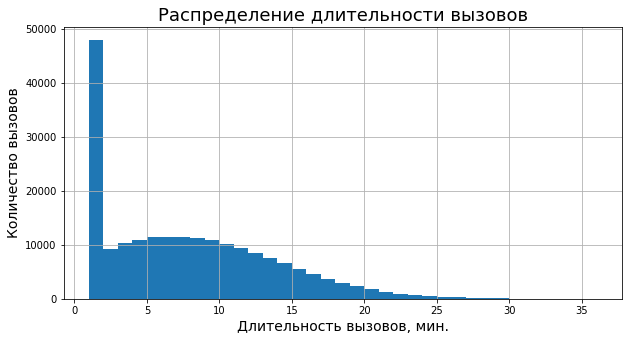

In [208]:
calls['duration_r'].hist(bins=35,range=(1, 36),figsize=(10,5))
plt.title('Распределение длительности вызовов', fontsize=18)
plt.xlabel('Длительность вызовов, мин.', fontsize=14)
plt.ylabel('Количество вызовов', fontsize=14);

В начале много нулевых значений мы заменили на 1, вот и виден выброс.

Посмотрим на длительность вызовов без 1 мин.

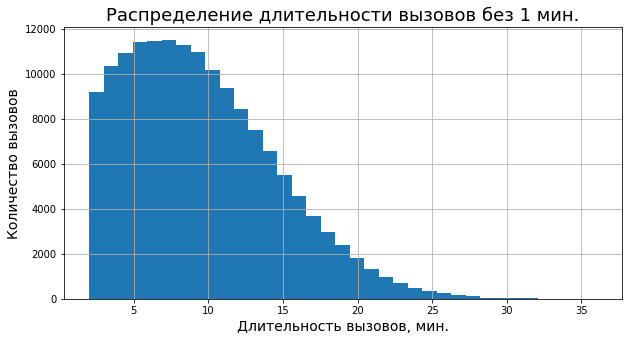

In [209]:
calls['duration_r'].hist(bins=35,range=(2, 36),figsize=(10,5))
plt.title('Распределение длительности вызовов без 1 мин.', fontsize=18)
plt.xlabel('Длительность вызовов, мин.', fontsize=14)
plt.ylabel('Количество вызовов', fontsize=14);

Наблюдаем около  нормальное распределение, что стыкуется с данными. Основные значения сосредоточены в диапазоне от 5 до примерно 8-10 минут, столько в основном люди и разговаривают.

Построим гистограмму интернет-трафика.

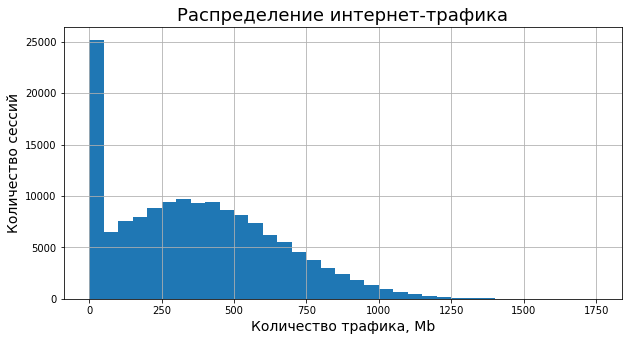

In [210]:
internet['mb_used'].hist(bins=35,range=(0, 1750),figsize=(10,5))
plt.title('Распределение интернет-трафика', fontsize=18)
plt.xlabel('Количество трафика, Mb', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14);

Аналогичный выброс на нуле, однако тут видимо люди просто не пользуются интернетом. Посмотрим на гистрограмму без нулевых значений.

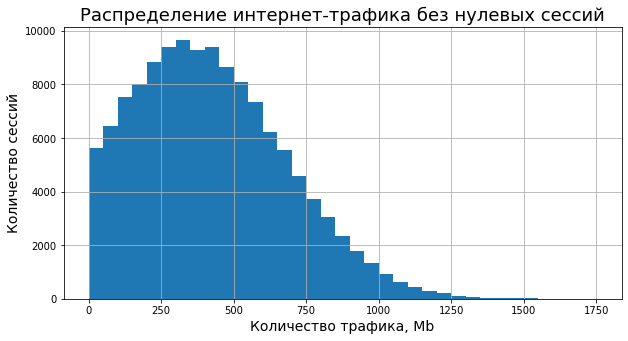

In [211]:
internet['mb_used'].hist(bins=35,range=(1, 1750),figsize=(10,5))
plt.title('Распределение интернет-трафика без нулевых сессий', fontsize=18)
plt.xlabel('Количество трафика, Mb', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14);

Видно такое же около  нормальное распределение. Основные значения сосредоточены в диапазоне от 200 до 500 мб за сессию.

Дата регистрации тарифа.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


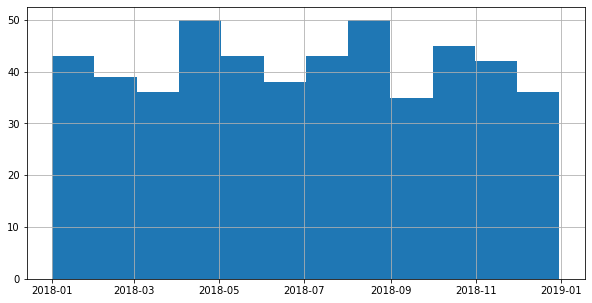

In [212]:
users['reg_date'].hist(figsize=(10,5), bins=12);

Видим, что со временем идет постоянное подключение новых тарифов.

Построим на одном графике длительность вызовов по тарифам.

In [213]:
user_tariff_calls = user_tariff.merge(calls, on='user_id', how='left')

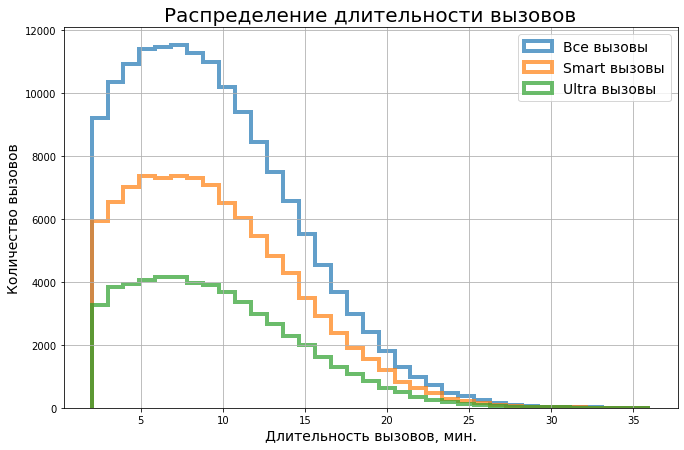

In [214]:
plt.subplots(figsize=(11, 7))
plt.hist(calls['duration_r'],
                               bins=35,
                               histtype='step',
                               linewidth=4,
                               alpha=0.7,
                               label='Все вызовы' , range=(2,36)#density=True
                              )
plt.hist(user_tariff_calls.query('tariff == "smart"')['duration_r'],
                               bins=35,
                               histtype='step',
                               linewidth=4,
                               alpha=0.7,
                               label='Smart вызовы' , range=(2,36)#density=True
                              )
plt.hist(user_tariff_calls.query('tariff == "ultra"')['duration_r'],
                               bins=35,
                               histtype='step',
                               linewidth=4,
                               alpha=0.7,
                               label='Ultra вызовы' , range=(2,36)#density=True
                              )
plt.legend(loc='best', fontsize=14)
plt.title('Распределение длительности вызовов', fontsize=20)
plt.xlabel('Длительность вызовов, мин.', fontsize=14)
plt.ylabel('Количество вызовов', fontsize=14);
plt.grid(True)
plt.show()

Видно, что на обоих тарифах пики в одном месте.

In [215]:
user_tariff_internet = user_tariff.merge(internet, on='user_id', how='left')
user_tariff_internet

,user_id,tariff,id,mb_used,session_date,session_month
0,1000,ultra,1000_0,112.95,2018-11-25,11.0
1,1000,ultra,1000_1,1052.81,2018-09-07,9.0
2,1000,ultra,1000_2,1197.26,2018-06-25,6.0
3,1000,ultra,1000_3,550.27,2018-08-22,8.0
4,1000,ultra,1000_4,302.56,2018-09-24,9.0
...,...,...,...,...,...,...
149394,1499,smart,1499_152,318.90,2018-10-03,10.0
149395,1499,smart,1499_153,490.13,2018-12-14,12.0
149396,1499,smart,1499_154,0.00,2018-10-27,10.0
149397,1499,smart,1499_155,1246.32,2018-11-26,11.0


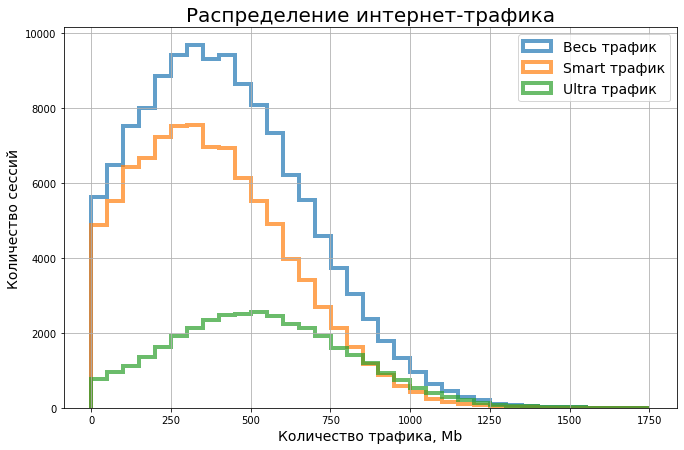

In [216]:
plt.subplots(figsize=(11, 7))
plt.hist(internet['mb_used'],
                               bins=35,
                               histtype='step',
                               linewidth=4,
                               alpha=0.7,
                               label='Весь трафик' , range=(1,1750)#density=True
                              )
plt.hist(user_tariff_internet.query('tariff == "smart"')['mb_used'],
                               bins=35,
                               histtype='step',
                               linewidth=4,
                               alpha=0.7,
                               label='Smart трафик' , range=(1,1750)#density=True
                              )
plt.hist(user_tariff_internet.query('tariff == "ultra"')['mb_used'],
                               bins=35,
                               histtype='step',
                               linewidth=4,
                               alpha=0.7,
                               label='Ultra трафик' , range=(1,1750)#density=True
                              )
plt.legend(loc='upper right', fontsize=14)
plt.title('Распределение интернет-трафика', fontsize=20)
plt.xlabel('Количество трафика, Mb', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14);
plt.grid(True)
plt.show()

Здесь пики немного различаются, пользователи тарифа 'Ultra' за сессию немного больше потребляют интернет-трафика.

# Проверяем гипотезы

<b>Формируем нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.

По заданию требуется проверить гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Поэтому если сможет опровергнуть нулевую гипотезу, то подтвердится альтернативаня гипотеза - средняя выручка различается, что и требуется по заданию.   
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяем метод scipy.stats.ttest_ind().

Найдем среднню выручку за год.

In [217]:
from scipy import stats as st

In [218]:
full_profit_per_month_mean = full_profit_per_month

In [219]:
full_profit_per_month_mean = full_profit_per_month_mean.replace(0,np.NaN)

In [220]:
for i in range(full_profit_per_month_mean.shape[0]):
        full_profit_per_month_mean.loc[i, 'mean'] = full_profit_per_month_mean.loc[i, 'январь':'декабрь'].mean().round(1)

In [221]:
full_profit_per_month_mean.head(10)

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,mean
0,1000,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.5,550.0,849.8
2,1002,smart,NaN,NaN,NaN,NaN,NaN,550.0,983.6,1518.6,810.0,550.0,1180.3,1087.8,954.3
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
4,1004,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
5,1005,smart,550.0,550.0,928.0,1258.0,868.0,919.0,820.0,970.0,556.0,1285.0,739.0,901.0,862.0
6,1006,smart,NaN,550.0,926.5,550.0,550.0,550.0,1451.9,1320.3,581.5,1397.0,550.0,1158.6,871.4
7,1007,smart,NaN,NaN,NaN,550.0,1004.5,724.0,874.9,1593.0,1072.0,550.0,1029.2,550.0,883.1
8,1008,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,568.0,568.0
9,1009,smart,NaN,NaN,550.0,550.0,550.0,688.2,2379.3,2180.5,1833.7,1472.2,840.2,1186.3,1223.0


Средняя выручка в год каждого пользователя тарифа Smart.

In [222]:
full_profit_per_month_mean.query('tariff == "smart"')['mean'].head()

1    849.8
2    954.3
5    862.0
6    871.4
7    883.1
Name: mean, dtype: float64

In [223]:
smart_mean_profit = full_profit_per_month_mean.query('tariff == "smart"')['mean']
ultra_mean_profit = full_profit_per_month_mean.query('tariff == "ultra"')['mean']

alpha = .05

results = st.ttest_ind(smart_mean_profit, ultra_mean_profit)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.5045924591137815e-45
Отвергаем нулевую гипотезу


<b>Тем самым делаем вывод, что средняя выручка тарифов «Ультра» и «Смарт» различается.

<b> Формируем нулевую гипотезу: средняя выручка пользователей из Москвы ровна выручке пользователей из других регионов.

По заданию требуется проверить гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, отсюда и идет наша нулевая гипотеза.

In [224]:
user_tariff_all.head()

,user_id,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,1000,30720,3000,1950,150,1,1
1,1001,smart,50,15360,500,550,200,3,3
2,1002,smart,50,15360,500,550,200,3,3
3,1003,ultra,1000,30720,3000,1950,150,1,1
4,1004,ultra,1000,30720,3000,1950,150,1,1


In [225]:
users_city.head()

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк


In [226]:
full_profit_per_month_mean_city = full_profit_per_month_mean.merge(users_city, on='user_id', how='left')

In [227]:
full_profit_per_month_mean_city.head()

,user_id,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,mean,city
0,1000,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Краснодар
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.5,550.0,849.8,Москва
2,1002,smart,NaN,NaN,NaN,NaN,NaN,550.0,983.6,1518.6,810.0,550.0,1180.3,1087.8,954.3,Стерлитамак
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Москва
4,1004,ultra,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,Новокузнецк


In [228]:
for i in range(full_profit_per_month_mean_city.shape[0]):
    if full_profit_per_month_mean_city.loc[i, 'city'] != 'Москва':
        full_profit_per_month_mean_city.loc[i, 'city'] = 'Другой'
full_profit_per_month_mean_city['city'].head()

0    Другой
1    Москва
2    Другой
3    Москва
4    Другой
Name: city, dtype: object

In [229]:
moscow_mean_profit = full_profit_per_month_mean_city.query('city == "Москва"')['mean']
another_mean_profit = full_profit_per_month_mean_city.query('city == "Другой"')['mean']

alpha = .05

results = st.ttest_ind(moscow_mean_profit, another_mean_profit)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4050942516636583
Не получилось отвергнуть нулевую гипотезу


In [230]:
full_profit_per_month_mean_city.query('city == "Москва"')['mean'].mean().astype('int')

1468

In [231]:
full_profit_per_month_mean_city.query('city == "Другой"')['mean'].mean().astype('int')

1527

<b> Полученное нами значение p-value говорит о том, что хотя средняя выручка в Москве и других городах примерно одинакова, с вероятностью в 40% такие значения можно получить случайно. Это явно слишком большая вероятность. Поэтому возможно и различается выручка, но достоверно мы сказать этого не можем.

# Общий вывод   

In [232]:
graph_smart = full_profit_per_month_mean.query('tariff == "smart"').reset_index(drop=True).drop(['user_id', 'mean'], axis=1)
graph_ultra = full_profit_per_month_mean.query('tariff == "ultra"').reset_index(drop=True).drop(['user_id', 'mean'], axis=1)

In [233]:
graph_smart.head()

,tariff,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
0,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.5,550.0
1,smart,NaN,NaN,NaN,NaN,NaN,550.0,983.6,1518.6,810.0,550.0,1180.3,1087.8
2,smart,550.0,550.0,928.0,1258.0,868.0,919.0,820.0,970.0,556.0,1285.0,739.0,901.0
3,smart,NaN,550.0,926.5,550.0,550.0,550.0,1451.9,1320.3,581.5,1397.0,550.0,1158.6
4,smart,NaN,NaN,NaN,550.0,1004.5,724.0,874.9,1593.0,1072.0,550.0,1029.2,550.0


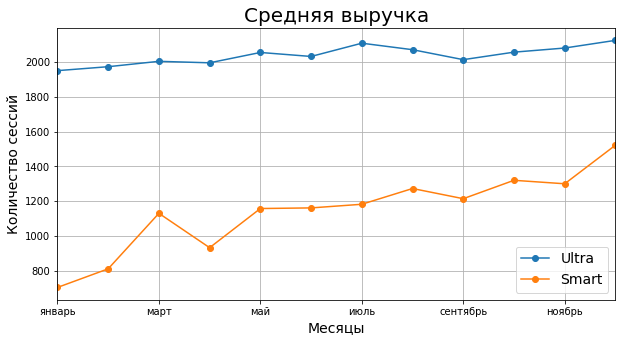

In [234]:
ax = graph_ultra.mean().plot(grid=True, figsize=(10,5), style='o-', label='Ultra')
graph_smart.mean().plot(grid=True, figsize=(10,5), style='o-', ax=ax, label='Smart')
plt.legend(loc='lower right', fontsize=14)
plt.title('Средняя выручка', fontsize=20)
plt.xlabel('Месяцы', fontsize=14)
plt.ylabel('Количество сессий', fontsize=14);
plt.grid(True)
plt.show()

Пользователей тарифа 'Смарт' больше и приост больше, в связи с этим видно как график средней выручки в месяц растет стремительней и в определенной точке будет данный тариф прибыльней. На короткой же дистанции выгодней тариф 'Ультра'.   

В процессе анализа выяснили сколько в среднем в месяц требуется абонентам разговоров, сообщений и интернет-трафика:      
Средняя длительность разговоров в месяц для пользователей тарифа Smart, мин.: 398.0   
Средняя длительность разговоров в месяц для пользователей тарифа Ultra, мин.: 525.0

Среднее количество сообщений в месяц для пользователей тарифа Smart: 36   
Среднее количество сообщений в месяц для пользователей тарифа Ultra: 55

Среднее количество интернет-трафика в месяц для пользователей тарифа Smart, Gb: 14   
Среднее количество интернет-трафика в месяц для пользователей тарифа Ultra, Gb: 17   

Основаня прибыль с пользователей тарифа 'Ультра' идет с абонентской платы и они очень редко выходят за пределы пакета, в то время как пользователи пакета 'Смарт' в среднем находятся на границе пакета, а значит часто выходят из него, и повышенные цены на услуги сверхлимита приносят дополнительный доход.   
Я бы рекомендовал коммерческому департаменту сосредоточить внимание на рекламе тарифа 'Смарт', в долгосрочной перспективе он выгодней в силу массовости и дополнительного дохода с сверх услуг.